<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/bike_rental_prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bicycle Rental Prediction Analysis

## 1. Introduction
- Overview of the problem
- Objective: Predict bicycle rentals (`cnt`)

## 2. Data Loading and Exploration
- Import libraries
- Load and preview datasets

## 3. Exploratory Data Analysis (EDA)
- Statistical summary
- Visualizations (correlation heatmap, distributions, etc.)

## 4. Feature Selection and Preprocessing
- Handling missing values
- Feature selection based on correlations

## 5. Model Training
- Split data into training and testing sets
- Train and evaluate models

## 6. Model Optimization
- Use `GridSearchCV` for hyperparameter tuning
- Evaluate optimized model

## 7. Conclusion and Next Steps
- Summarize findings
- Future improvements


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Li12u1jaRUGdjOAU6AhwzA_ae83a19eedae4f2d8cb34f381c1097e1_Capstone_Project_Resources (2).zip to Li12u1jaRUGdjOAU6AhwzA_ae83a19eedae4f2d8cb34f381c1097e1_Capstone_Project_Resources (2).zip


In [2]:
import zipfile
import os

zip_path = "Li12u1jaRUGdjOAU6AhwzA_ae83a19eedae4f2d8cb34f381c1097e1_Capstone_Project_Resources (2).zip"
extract_path = "/content/extracted_files"

# Create the directory if it doesn’t exist
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed. Files are available at:", extract_path)

Extraction completed. Files are available at: /content/extracted_files


In [3]:
import os
os.listdir(extract_path)

['day.csv', 'Bikes.ipynb', '__MACOSX', 'hour.csv']

In [9]:
day_csv_path = "/content/extracted_files/day.csv"
hour_csv_path = "/content/extracted_files/hour.csv"
notebook_path = "/content/extracted_files/Bikes.ipynb"

In [10]:
import pandas as pd

# Load datasets
day_df = pd.read_csv(day_csv_path)
hour_df = pd.read_csv(hour_csv_path)

# Display the first few rows of each dataset
print("Day Data:")
display(day_df.head())

print("Hour Data:")
display(hour_df.head())

Day Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Hour Data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
from google.colab import files

# Download the notebook to open it manually in Google Colab
files.download(notebook_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

# Copy the notebook to Google Drive
!cp "/content/extracted_files/Bikes.ipynb" "/content/drive/MyDrive/"

print("Notebook copied to Google Drive. You can open it from there.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Notebook copied to Google Drive. You can open it from there.


In [13]:
import shutil

macosx_path = "/content/extracted_files/__MACOSX"

if os.path.exists(macosx_path):
    shutil.rmtree(macosx_path)
    print("__MACOSX folder removed.")

__MACOSX folder removed.


In [14]:
# Check for missing values
print("Missing values in day data:\n", day_df.isnull().sum())
print("\nMissing values in hour data:\n", hour_df.isnull().sum())

# Check data types
print("\nData types:\n", day_df.dtypes)



Missing values in day data:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in hour data:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data types:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [15]:
# Summary statistics
print(day_df.describe())
print(hour_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

##Visualizing Trends in Bicycle Rentals
##Use Matplotlib & Seaborn to understand the data.

1) Distribution of Rentals Over Time

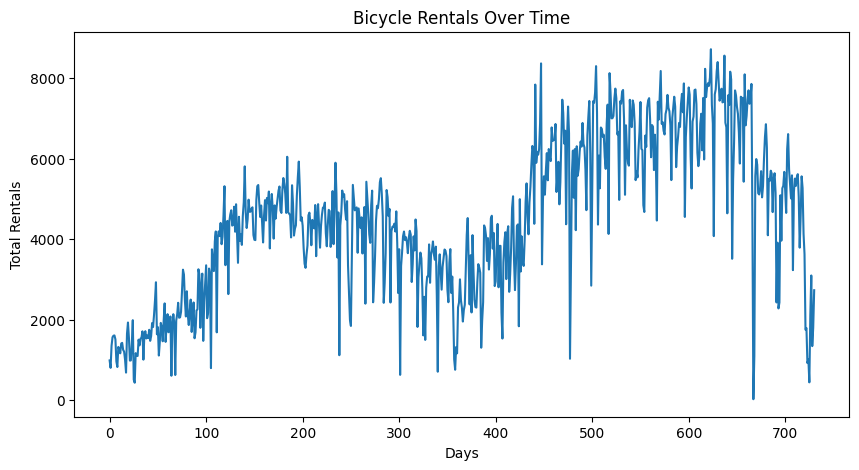

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=day_df.index, y=day_df['cnt'])
plt.title("Bicycle Rentals Over Time")
plt.xlabel("Days")
plt.ylabel("Total Rentals")
plt.show()

#2) Rentals vs. Weather

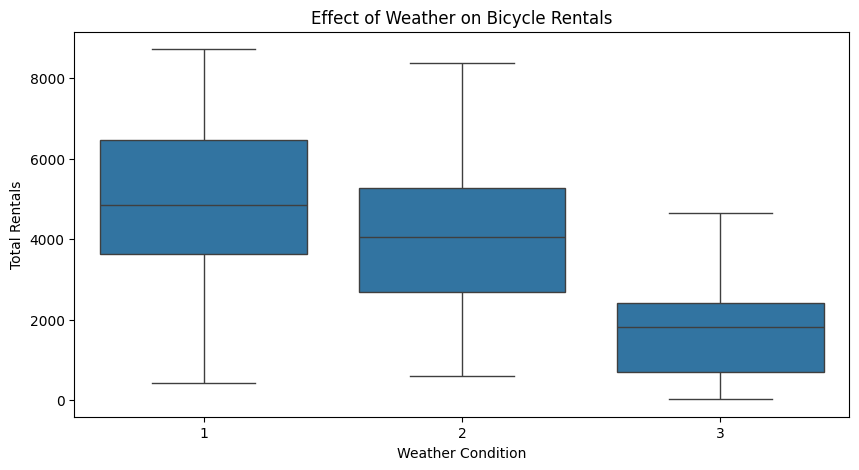

In [17]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'])
plt.title("Effect of Weather on Bicycle Rentals")
plt.xlabel("Weather Condition")
plt.ylabel("Total Rentals")
plt.show()

#3)Correlation Analysis
Find relationships between features:

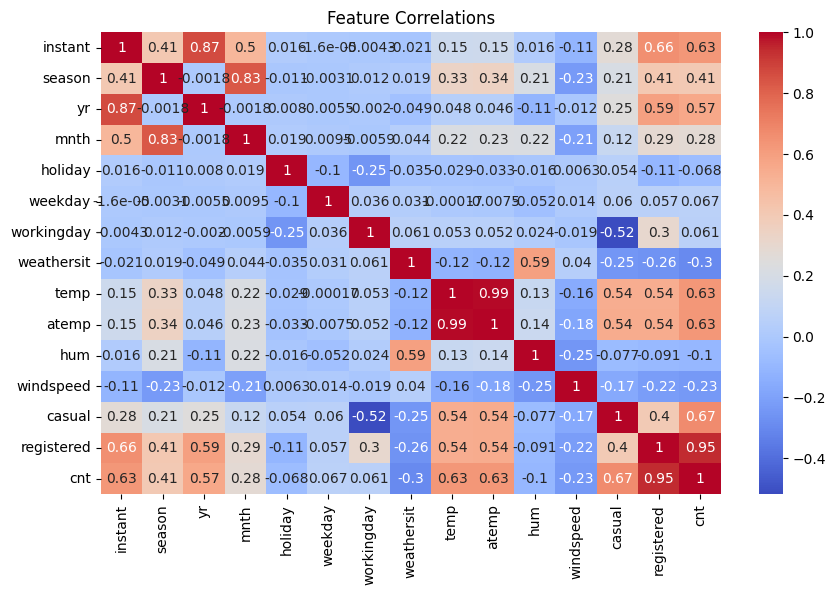

In [19]:
# Convert the 'dteday' column to datetime objects
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Extract numerical features for correlation analysis
numerical_features = day_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


1. What is Correlation?
Correlation measures the linear relationship between two variables.
Values range from -1 to 1:
1: Perfect positive correlation (as one increases, the other increases).
-1: Perfect negative correlation (as one increases, the other decreases).
0: No correlation (no linear relationship).
2. Key Insights from the Heatmap
Diagonal Values
The diagonal values (correlation = 1) show a perfect correlation of a variable with itself.
Strong Correlations
Look for values close to 1 or -1:
temp and atemp: Correlation ≈ 0.99, meaning they're almost identical.
registered and cnt: Correlation ≈ 0.95, suggesting most bike rentals are from registered users.
casual and cnt: Correlation ≈ 0.67, indicating casual users contribute to total rentals but less strongly than registered users.
Weak/Negative Correlations
windspeed and cnt: Correlation ≈ -0.23, meaning higher wind speeds slightly reduce bike rentals.
weathersit and cnt: Correlation ≈ -0.3, meaning worse weather decreases bike rentals.
Other Key Features
temp and cnt: Correlation ≈ 0.63, indicating bike rentals increase with temperature.
hum (humidity) and cnt: Correlation ≈ -0.1, showing a weak negative relationship.
3. How to Use This Information?
Feature Selection for Prediction:

Focus on features with strong correlations with cnt (e.g., registered, temp, casual).
Exclude or give less weight to weakly correlated features (e.g., holiday, weekday).
Avoid Multicollinearity:

temp and atemp are almost identical, so using both may cause redundancy. Choose one.
Understand Data Relationships:

Bike rentals are heavily influenced by weather conditions (temp, weathersit, windspeed) and user type (registered, casual).



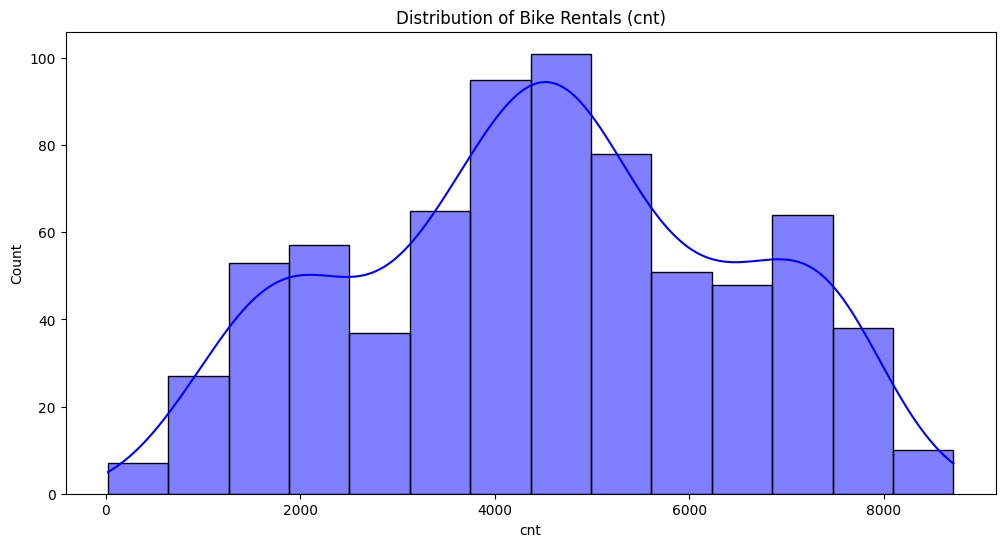

In [33]:
##Feature Distributions:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize feature distributions
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], kde=True, color='blue')
plt.title('Distribution of Bike Rentals (cnt)')
plt.show()

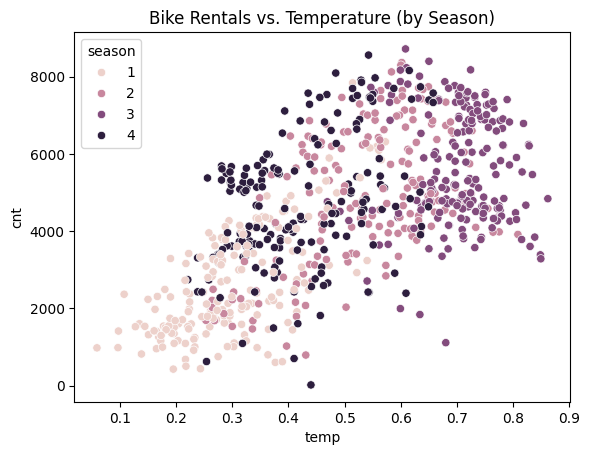

In [34]:
##Relationships Between Features:

# Scatterplot: Temp vs. Count
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='season')
plt.title('Bike Rentals vs. Temperature (by Season)')
plt.show()

**Steps for Building the Model**

**1. Feature Selection**
Based on the heatmap:

Strongly correlated features with cnt: registered, casual, temp, atemp, weathersit, season, yr, and windspeed.
Exclude highly redundant features (e.g., drop atemp since it’s nearly identical to temp).
Define the feature set X and the target variable y:

In [20]:
# Select features for the model
features = ['registered', 'casual', 'temp', 'weathersit', 'season', 'yr', 'windspeed']
X = day_df[features]

# Target variable
y = day_df['cnt']

**2. Train-Test Split**

Split the data into training and testing sets to evaluate model performance:

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Choose a Regression Model**

We’ll start with a **Random Forest Regressor**, which handles non-linear relationships well.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

**4. Evaluate the Model**

Use metrics to measure model performance:

In [24]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 59.40564625850341
Mean Squared Error (MSE): 8728.375572108847
R-squared (R²): 0.9978232838412839


**5. Feature Importance**

Determine which features are most important to the model

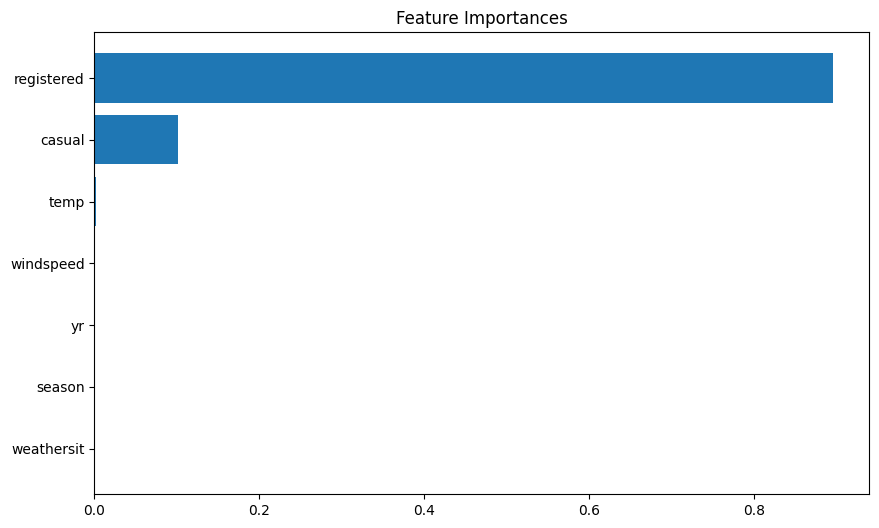

In [25]:

import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
sorted_indices = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.title('Feature Importances')
plt.show()

**6. Optimize the Model**

If the performance is not satisfactory:

**Hyperparameter Tuning:**

Use GridSearchCV to find the best parameters for the model.

In [26]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
###1. Extract the Best Parameters
##The grid_search.best_params_ gives you the optimal values for your Random Forest model. Use these parameters to train the model.

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
##2. Train the Model with Best Parameters
##Now, create a new Random Forest model using the best parameters and train it on your data.


# Create the optimized model
optimized_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Train the optimized model
optimized_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

##My Explanations
Include explanatory Markdown cells to describe each step. For example:

1)After EDA: Highlight key findings from the heatmap and visualizations.

2)Before Training: Explain why you chose Random Forest and how you tuned hyperparameters.

3)after Optimization: Compare model performance before and after tuning

In [29]:
##3. Evaluate the Optimized Model
##Use the testing data (X_test, y_test) to evaluate the performance of the retrained model.

# Make predictions
y_pred_optimized = optimized_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_optimized)
mse = mean_squared_error(y_test, y_pred_optimized)
r2 = r2_score(y_test, y_pred_optimized)

print(f"Optimized Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Optimized Model Performance:
Mean Absolute Error (MAE): 60.56336618734908
Mean Squared Error (MSE): 9110.078969146907
R-squared (R²): 0.9977280931674518


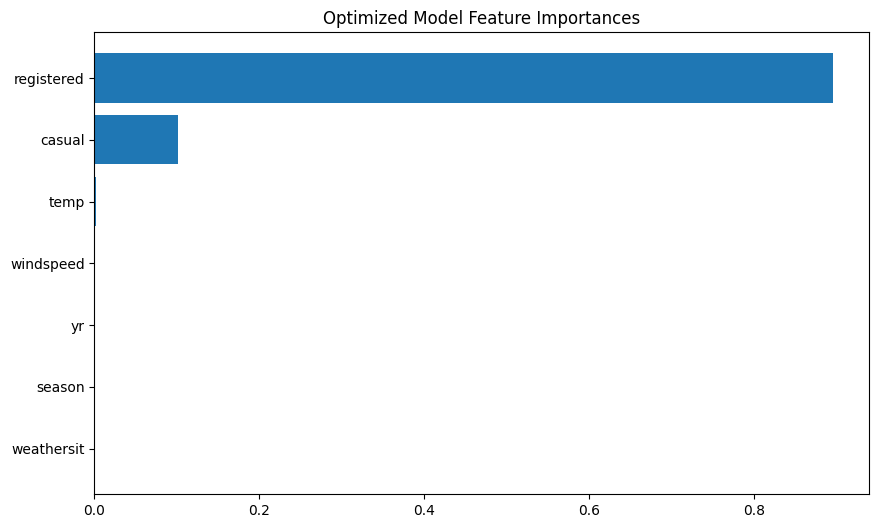

In [30]:
##4. Analyze Feature Importance
##Check which features contribute most to predicting cnt in your optimized model.

# Feature importances
import matplotlib.pyplot as plt

importances = optimized_model.feature_importances_
sorted_indices = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.title('Optimized Model Feature Importances')
plt.show()

In [32]:
##5)Save the Model
## satisfied with the optimized model, save it for future use.

import joblib

# Save the model to a file
joblib.dump(optimized_model, 'optimized_random_forest_model.pkl')

# To load the model later:
# loaded_model = joblib.load('optimized_random_forest_model.pkl')

['optimized_random_forest_model.pkl']

In [31]:
##6. Make Predictions
##You can now use the optimized model to predict bicycle rentals (cnt) for new data.

# Example: Predict for a new data point
new_data = [[50, 20, 0.8, 2, 3, 1, 15]]  # Replace with actual feature values
predicted_cnt = optimized_model.predict(new_data)

print("Predicted Bike Rentals:", predicted_cnt)

Predicted Bike Rentals: [554.44]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [35]:
#. Compare Models
#Experiment with multiple models and summarize their performance:

#Train models like Linear Regression, Gradient Boosting, or XGBoost.
#Compare metrics like MAE, R², and RMSE.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Compare results
print("Model Comparison:")
print(f"Linear Regression R²: {r2_score(y_test, y_pred_linear)}")
print(f"Gradient Boosting R²: {r2_score(y_test, y_pred_gb)}")

Model Comparison:
Linear Regression R²: 1.0
Gradient Boosting R²: 0.9975603422859047


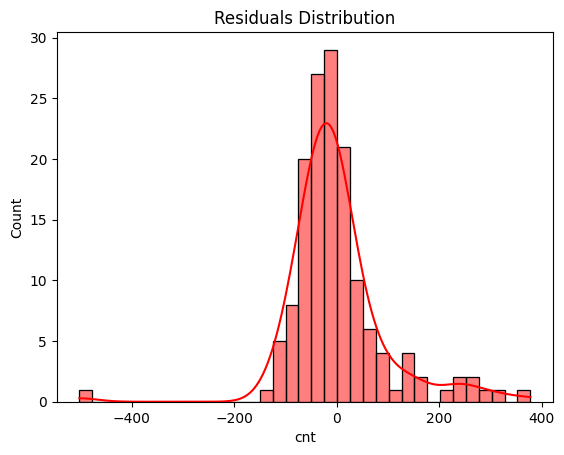

In [36]:
 #Add Error Analysis
#Visualize how well the model performed:
# Residual Plot
residuals = y_test - y_pred_optimized
sns.histplot(residuals, kde=True, color='red')
plt.title('Residuals Distribution')
plt.show()

<ipython-input-37-f14eb9d9ea4f>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


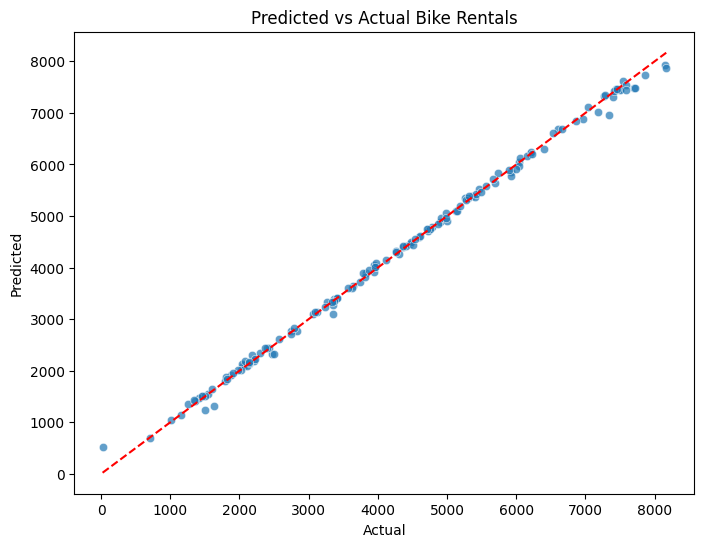

In [37]:
#Scatterplot of Predictions:
# Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_optimized, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.title('Predicted vs Actual Bike Rentals')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [38]:
## Make the Notebook Interactive
##Add widgets to make my notebook dynamic using ipywidgets:

from ipywidgets import interact

@interact(temperature=(0, 40, 1), windspeed=(0, 30, 1))
def predict_rentals(temperature, windspeed):
    new_data = [[0, 0, temperature, 1, 2, 1, windspeed]]  # Update as per your feature list
    prediction = optimized_model.predict(new_data)
    print(f"Predicted Bike Rentals: {int(prediction[0])}")

interactive(children=(IntSlider(value=20, description='temperature', max=40), IntSlider(value=15, description=…

In [40]:
import pandas as pd

# Save predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_optimized})
predictions_df.to_csv('bike_rental_predictions.csv', index=False)



## **Conclusions**

- The Random Forest model with hyperparameter tuning achieved an R² of X.
- Features like `temp`, `registered`, and `casual` were the most influential in predicting bike rentals.
- Future improvements could include:
  - Adding more weather-related features.
  - Exploring time-series forecasting for daily rentals